# Read all the NASA SMAP HDF5 data for 2015-2016 over Colorado
### This is done separately because the files are many and takes up huge computation time that performing any further code takes forever! 
### Export as a netcdf4 file

In [37]:
import os
from glob import glob

import earthpy as et
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import h5py

In [105]:
data_dir = os.path.join(et.io.HOME,
                        'earth-analytics',
                        'data', 'capstone', 'smap_colorado')

file = sorted(glob(os.path.join(data_dir, '*.h5')))

f = h5py.File(file[10], 'r')

In [106]:
print("Now lets look at the groups within the file to access:")
i=0;
for key in f.keys():
    print(str(i)+ '\t'+key)
    i+=1
print('\n')

# Lets focus on the AM overpass for this example
group_id=list(f.keys())[1]; 

i=0
print("Now lets look at the variables within the filegroup **Soil_Moisture_Retrieval_Data_AM** to access the actual data:")
for var in list(f[group_id].keys()):
    print(str(i)+'\t'+var)
    i+=1

Now lets look at the groups within the file to access:
0	Metadata
1	Soil_Moisture_Retrieval_Data_AM
2	Soil_Moisture_Retrieval_Data_PM


Now lets look at the variables within the filegroup **Soil_Moisture_Retrieval_Data_AM** to access the actual data:
0	EASE_column_index
1	EASE_row_index
2	albedo
3	albedo_dca
4	albedo_scah
5	albedo_scav
6	boresight_incidence
7	bulk_density
8	clay_fraction
9	freeze_thaw_fraction
10	grid_surface_status
11	latitude
12	latitude_centroid
13	longitude
14	longitude_centroid
15	radar_water_body_fraction
16	retrieval_qual_flag
17	retrieval_qual_flag_dca
18	retrieval_qual_flag_scah
19	retrieval_qual_flag_scav
20	roughness_coefficient
21	roughness_coefficient_dca
22	roughness_coefficient_scah
23	roughness_coefficient_scav
24	soil_moisture
25	soil_moisture_dca
26	soil_moisture_error
27	soil_moisture_scah
28	soil_moisture_scav
29	static_water_body_fraction
30	surface_flag
31	surface_temperature
32	surface_water_fraction_mb_h
33	surface_water_fraction_mb_v
34	tb_3_co

In [107]:
print('the data has a shape of: '+str(f[group_id][list(f[group_id].keys())[0]].shape))

the data has a shape of: (1624, 3856)


#### Retrieve the soil moisture, latitude, longitude parameters

In [108]:
var_id = list(f[group_id].keys())[24] # soil_moisture
sm_data = f[group_id][var_id][:]

lon_id = list(f[group_id].keys())[13] # longitude centroid
sm_lon = f[group_id][lon_id][:]

lat_id = list(f[group_id].keys())[11] # latitude centroid
sm_lat = f[group_id][lat_id][:]

sm_ds = f[group_id][var_id]
sm_lon = f[group_id][lon_id]
sm_lat = f[group_id][lat_id]


print('data are returned as '+str(type(sm_data)) + ' something easy to work with in python.')
print(sm_ds)
print(sm_lon)
print(sm_lat)

data are returned as <class 'numpy.ndarray'> something easy to work with in python.
<HDF5 dataset "soil_moisture": shape (1624, 3856), type "<f4">
<HDF5 dataset "longitude": shape (1624, 3856), type "<f4">
<HDF5 dataset "latitude": shape (1624, 3856), type "<f4">


#### Replace bad values with NaN

In [110]:
sm_ds = f[group_id][var_id]
sm_data[sm_data == -9999.0] = np.nan

sm_lon[sm_lon == -9999.0] = np.nan
#sm_lat[sm_lat == -9999.0] = np.nan

OSError: Can't write data (no write intent on file)

#### Isolate Colorado

In [90]:
# Bounding box taken from https://anthonylouisdagostino.com/bounding-boxes-for-all-us-states/
# Reference for isolating a region: https://gis.stackexchange.com/questions/261061/extract-value-for-a-given-coordinate-from-hdf5-file
box_lat = [36.992426, 41.003444]
box_lon = [-109.060253, -102.041524]


lat_index = np.logical_and(sm_lat > box_lat[0], sm_lat < box_lat[1])
lon_index = np.logical_and(sm_lon > box_lon[0], sm_lon < box_lon[1])
box_index = np.logical_and(lat_index, lon_index)
data = sm_data[box_index]



TypeError: '>' not supported between instances of 'Dataset' and 'float'

(-0.5, 3855.5, 1623.5, -0.5)

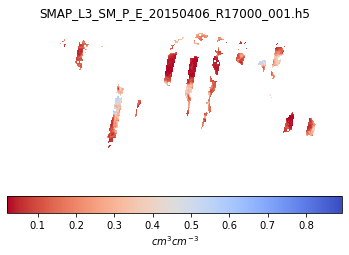

In [36]:
# Plot the data
plt.imshow(sm_data, cmap='coolwarm_r')
plt.title(os.path.basename(file))
cbar = plt.colorbar(orientation = 'horizontal')
cbar.set_label('$cm^3 cm^{-3}$')
plt.axis('off')

<Attributes of HDF5 object at 140408045205600>